# Improting necessary packages

In [1]:
import numpy as np
import glob
import os
import ntpath
import torch
from matplotlib import pyplot as plt
import pandas as pd 

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# so printing would be easier to read!
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
def plot_conf_mat(confusion_matrix, display_labels, cmap='RdYlGn'):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=display_labels)
    disp.plot(cmap=cmap, include_values=False)
    disp.ax_.set_xlabel('Output', fontsize=16, fontweight='bold')
    disp.ax_.xaxis.set_label_position('top') 
    disp.ax_.set_ylabel('Input', fontsize=16, fontweight='bold')
    disp.ax_.xaxis.set_ticks_position('top')

    plt.setp(disp.ax_.get_yticklabels(), rotation=90, va="center", rotation_mode="default")  


    for i in range((confusion_matrix.shape[0])):
        for j in range((confusion_matrix.shape[1])):
            text = disp.ax_.text(
                j, i, '%.1f' % confusion_matrix[i, j], ha="center", va="center", 
                color="black", fontsize=16
            )
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    disp.ax_.images[-1].colorbar.remove()
    cbar = disp.figure_.colorbar(disp.im_, format='%.1f',)

    disp.figure_.tight_layout()
    return disp

# Setting the results directors.

In [3]:
results_dir = '../results/celeba/'

colour_spaces = ['dkl', 'lab', 'rgb', 'lms']

models = ['k008_d008', 'k008_d128']

evaluation = 'deltae2000'

# Reading the DeltaE results

In [4]:
model_result = dict()
for model in models:
    all_results = dict()
    for path in sorted(glob.glob(os.path.join(results_dir, evaluation, model) + '/*.txt')):
        current_result = np.loadtxt(path)
        conversion_name = ntpath.basename(path)[:-4]
        all_results[conversion_name] = current_result
    model_result[model] = all_results

# Organising the results into a matrix

In [5]:
model_confs = dict()
for model in models:
    ncspaces = len(colour_spaces)
    confusion_matrix = np.zeros((ncspaces, ncspaces))
    for key, result in model_result[model].items():
        rind = colour_spaces.index(key[:3])
        cind = colour_spaces.index(key[4:7])
        confusion_matrix[rind, cind] = np.mean(result, axis=0)[1]
        
    model_confs[model] = confusion_matrix

# Plotting the confusion matrices

## K=8 and D=128

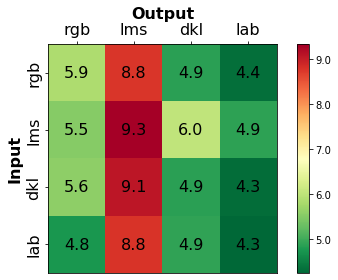

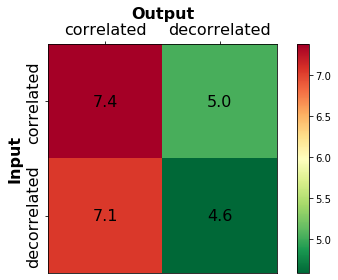

In [6]:
out_dir = '../figures/'
db_name = 'celeba'
model = 'k008_d128'

confusion_matrix_4 = model_confs[model][[2, 3, 0, 1]][:, [2, 3, 0, 1]]

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))

## K=8 and D=8

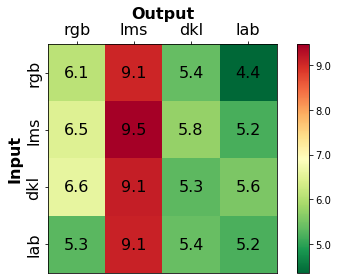

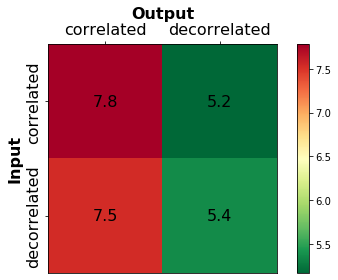

In [7]:
out_dir = '../figures/'
db_name = 'celeba'
model = 'k008_d008'

confusion_matrix_4 = model_confs[model][[2, 3, 0, 1]][:, [2, 3, 0, 1]]

corr = ['rgb', 'lms']
deco = ['dkl', 'lab']

display_labels = ['rgb', 'lms', 'dkl', 'lab']
disp = plot_conf_mat(confusion_matrix_4, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat4.png' % (out_dir, db_name, model, evaluation))

confusion_matrix_2 = np.zeros((2, 2))
for i in range(confusion_matrix_4.shape[0]):
    if i < 2:
        indi = 0
    else:
        indi = 1
    for j in range(confusion_matrix_4.shape[1]):
        if j < 2:
            indj = 0
        else:
            indj = 1
        confusion_matrix_2[indi, indj] += confusion_matrix_4[i, j]

confusion_matrix_2 /= 4

display_labels = ['correlated', 'decorrelated']
disp = plot_conf_mat(confusion_matrix_2, display_labels, cmap='RdYlGn_r')
disp.figure_.savefig('%s/%s_%s_%s_confmat2.png' % (out_dir, db_name, model, evaluation))